<a href="https://colab.research.google.com/github/TirmidziOthman/Vehicle-Routing-Problem---ACO/blob/main/5A_G1_Tirmidzi_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#/content/drive/MyDrive/Colab Notebooks/datasets/vrp-eg.xlsx
import numpy as np
import pandas as pd
data = pd.ExcelFile('/content/drive/MyDrive/Colab Notebooks/datasets/vrp-eg.xlsx')
distance = pd.read_excel(data,'Sheet1')
city_location = pd.read_excel(data,'Sheet2')
demand1 = pd.read_excel(data,'Sheet3')

distance_matrix1 = distance.iloc[:,1:].values
coordinates1 = city_location.iloc[:,1:].values
demandd = demand1.iloc[:,1].values


Best Solution: [0, 5, 6, 3, 3, 0, 7, 1, 2, 5, 0, 8, 9, 4, 0, 0]
Best Distance: 278
Vehicle 1 Route: [0, 5, 6, 3, 3]
Vehicle 1 Distance: 45
Vehicle 2 Route: [0, 7, 1, 2, 5]
Vehicle 2 Distance: 84
Vehicle 3 Route: [0, 8, 9, 4]
Vehicle 3 Distance: 62
Vehicle 4 Route: [0]
Vehicle 4 Distance: 0
Vehicle 5 Route: [0]
Vehicle 5 Distance: 0


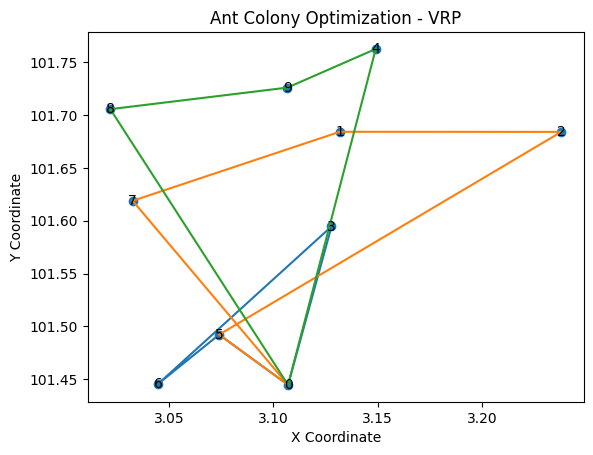

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class AntColonyOptimization:
    def __init__(self, num_ants, num_iterations, evaporation_rate, alpha, beta, Q, capacity):
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.evaporation_rate = evaporation_rate
        self.alpha = alpha
        self.beta = beta
        self.Q = Q
        self.capacity = capacity

    def optimize(self, distance_matrix, demand):
        num_nodes = len(distance_matrix)
        pheromone_matrix = np.ones((num_nodes, num_nodes))

        best_solution = None
        best_distance = np.inf

        for iteration in range(self.num_iterations):
            ant_solutions = []
            ant_distances = []

            for ant in range(self.num_ants):
                visited = [False] * num_nodes
                current_node = 0  # Start from the first node
                current_capacity = self.capacity

                visited[current_node] = True
                solution = [current_node]
                distance = 0

                while False in visited:
                    probabilities = self.calculate_probabilities(current_node, visited, pheromone_matrix, distance_matrix, demand, current_capacity)
                    next_node = np.random.choice(range(num_nodes), p=probabilities)
                    solution.append(next_node)
                    distance += distance_matrix[current_node][next_node]
                    current_capacity -= demand[next_node]

                    current_node = next_node
                    visited[current_node] = True

                    if current_capacity < 0:  # If capacity is exceeded, return to the depot
                        distance += distance_matrix[current_node][0]
                        solution.append(0)
                        current_node = 0
                        current_capacity = self.capacity

                distance += distance_matrix[current_node][0]  # Return to the starting node
                solution.append(0)

                ant_solutions.append(solution)
                ant_distances.append(distance)

                if distance < best_distance:
                    best_solution = solution
                    best_distance = distance

            self.update_pheromone(pheromone_matrix, ant_solutions, ant_distances)

        return best_solution, best_distance

    def calculate_probabilities(self, current_node, visited, pheromone_matrix, distance_matrix, demand, current_capacity):
        num_nodes = len(visited)

        probabilities = np.zeros(num_nodes)
        total = 0

        for node in range(num_nodes):
            if not visited[node] and demand[node] <= current_capacity:
                numerator = pheromone_matrix[current_node][node] ** self.alpha
                denominator = distance_matrix[current_node][node] ** self.beta
                probabilities[node] = numerator / denominator
                total += probabilities[node]

        if total == 0:  # If all eligible nodes are visited, return equal probabilities
            probabilities = np.ones(num_nodes) / num_nodes
        else:
            probabilities /= total

        return probabilities

    def update_pheromone(self, pheromone_matrix, ant_solutions, ant_distances):
        num_nodes = len(pheromone_matrix)
        pheromone_matrix *= (1 - self.evaporation_rate)

        for solution, distance in zip(ant_solutions, ant_distances):
            for i in range(num_nodes - 1):
                node1, node2 = solution[i], solution[i + 1]
                pheromone_matrix[node1][node2] += self.Q / distance
                pheromone_matrix[node2][node1] += self.Q / distance


# Example usage
if __name__ == '__main__':
    # Example input data
    coordinates = coordinates1.tolist()#[(3.1071, 101.4446), (3.1319, 101.6841), (3.2379, 101.6840), (3.1279, 101.5945), (3.1491, 101.7625), (3.0741, 101.4922),(3.0449, 101.4456), (3.0327, 101.6188), (3.0220, 101.7055), (3.1068, 101.7259)]
    demand = demandd.tolist()#[0, 400, 200, 400, 400, 200, 300, 400, 500, 400]
    capacity = 1000

    distance_matrix = distance_matrix1

    # Create an instance of AntColonyOptimization
    num_ants = 30
    num_iterations = 100
    evaporation_rate = 0.5
    alpha = 3
    beta = 4
    Q = 200
    aco = AntColonyOptimization(num_ants, num_iterations, evaporation_rate, alpha, beta, Q, capacity)

    # Run the optimization
    best_solution, best_distance = aco.optimize(distance_matrix, demand)

    # Print the best solution and distance
    print("Best Solution:", best_solution)
    print("Best Distance:", best_distance)


# Plot the points
x_coords = [coord[0] for coord in coordinates]
y_coords = [coord[1] for coord in coordinates]

plt.figure()
plt.scatter(x_coords, y_coords)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Ant Colony Optimization - VRP')

# Add labels to the points and time windows
for i, (x, y) in enumerate(zip(x_coords, y_coords)):
    plt.text(x, y, str(i), ha='center', va='center')

# Connect the points in the best solution for each vehicle
num_vehicles = 5
depot_indices = [i for i, node in enumerate(best_solution) if node == 0]
depot_indices.append(len(best_solution))

if len(depot_indices) > num_vehicles + 1:
    depot_indices = depot_indices[:num_vehicles + 1]
elif len(depot_indices) < num_vehicles + 1:
    depot_indices.extend([0] * (num_vehicles + 1 - len(depot_indices)))

for i in range(num_vehicles):
    start_index = depot_indices[i]
    end_index = depot_indices[i + 1]
    vehicle_route = best_solution[start_index:end_index]

    vehicle_x = [coordinates[node][0] for node in vehicle_route]
    vehicle_y = [coordinates[node][1] for node in vehicle_route]
    vehicle_x.append(coordinates[0][0])  # Return to depot
    vehicle_y.append(coordinates[0][1])  # Return to depot

    plt.plot(vehicle_x, vehicle_y)

    # Print the vehicle route
    print("Vehicle", i + 1, "Route:", vehicle_route)

    # Calculate and print the distance of the vehicle route
    vehicle_distance = sum(distance_matrix[node1][node2] for node1, node2 in zip(vehicle_route, vehicle_route[1:]))
    print("Vehicle", i + 1, "Distance:", vehicle_distance)

plt.show()
